<a href="https://colab.research.google.com/github/nikhil2020/Detect_Parking_Space/blob/master/Parking_Lots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parking Spots Detector

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#####  Problem Statement :- To detect the avalability of  parking space  for cars

In [27]:
# Scikit-Learn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Building the CNN model 

In [28]:
# Keras libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.layers import Dropout

In [29]:
# Initialising the CNN
classifier = Sequential()

##### Convolution CNN Layer

Intuition of the convolution layers:
First take the image as input in input layers.
Then apply the no. of  feature detector on the image to extract the features from the image

In [30]:
# No. of filters is 32 with size of 3*3
# Input image size is 32*32 and 3 is for color image
# relu is the activation function in the convolution layer
classifier.add(Convolution2D(64,3,3,input_shape = (32,32,3),activation='relu'))

##### Maxpooling Layer

In [31]:
# Maxpooling layers is use to extract the most important feature from the feature Map(collection of filter detector)
classifier.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
classifier.add(BatchNormalization())


In [32]:

classifier.add(Convolution2D(64,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
classifier.add(BatchNormalization())


##### Flatten 

In [33]:
# Converting the matrix of size 2*2 into 1D Array
# This Flatten 1D array will be  input layer to the ANN model
classifier.add(Flatten())

<h2>Fully Connected </h2>


##### Hidden Layer 

In [34]:
import tensorflow as tf

In [35]:
classifier.add(Dense(output_dim = 150 , activation ='relu'))

In [36]:
classifier.add(BatchNormalization())

##### Output Layer

In [37]:
classifier.add(Dense(output_dim = 1 , activation ='softmax'))

<h2> Compile the CNN </h2>

In [38]:
classifier.compile(optimizer ='adam',
                   loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
pwd

'/content/drive/My Drive/Datasets/parking_spots_detector'

In [40]:
#Set the default directory
import os 
os.chdir("/content/drive/My Drive/Datasets/parking_spots_detector")

In [41]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

<h2> Image Preprocessing and Augumentation </h2>

In [42]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
        'train_data/train',
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

test_data = test_datagen.flow_from_directory(
        'train_data/test',
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

Found 381 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


# Data Visualization

In [43]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [44]:
def create_stack_bar_data(col, df):
    aggregated = df[col].value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

In [45]:
train = pd.DataFrame(train_data.classes, columns=['classes'])
test = pd.DataFrame(test_data.classes, columns=['classes'])

In [46]:
x1, y1 = create_stack_bar_data('classes', train)
x1 = list(train_data.class_indices.keys())

trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Class Count")
layout = dict(height=600, width=600, title='Class Distribution in Training Data', legend=dict(orientation="h"), 
                yaxis = dict(title = 'Class Count'))
fig = go.Figure(data=[trace1], layout=layout);
iplot(fig);

In [47]:
x2, y2 = create_stack_bar_data('classes', test)
x2 = list(test_data.class_indices.keys())

Graph = go.Bar(x=x2, y=y2, opacity=0.75, name="Class Count")
layout = dict(height=600, width=600, title='Class Distribution in Validation Data', legend=dict(orientation="v"), 
                yaxis = dict(title = 'Class Count'))
fig = go.Figure(data=[Graph], layout=layout);
iplot(fig);

In [48]:
history_object = classifier.fit_generator(
                                        train_data,
                                        steps_per_epoch=381,
                                        epochs=5,
                                        validation_data=test_data,
                                        validation_steps=164)

Epoch 1/5
381/381 [==============================] - 171s 449ms/step - loss: 3.8651 - accuracy: 0.7479 - val_loss: 3.3358 - val_accuracy: 0.7685
Epoch 2/5
381/381 [==============================] - 37s 97ms/step - loss: 3.8589 - accuracy: 0.7483 - val_loss: 2.3827 - val_accuracy: 0.7678
Epoch 3/5
381/381 [==============================] - 39s 101ms/step - loss: 3.8657 - accuracy: 0.7478 - val_loss: 3.8123 - val_accuracy: 0.7686
Epoch 4/5
381/381 [==============================] - 37s 97ms/step - loss: 3.8625 - accuracy: 0.7482 - val_loss: 5.7185 - val_accuracy: 0.7674
Epoch 5/5
381/381 [==============================] - 37s 96ms/step - loss: 3.8674 - accuracy: 0.7478 - val_loss: 2.8592 - val_accuracy: 0.7691


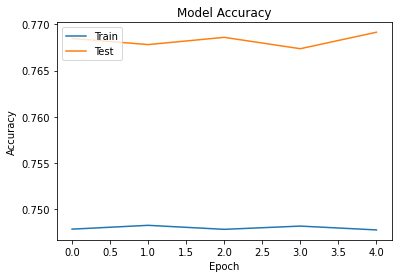

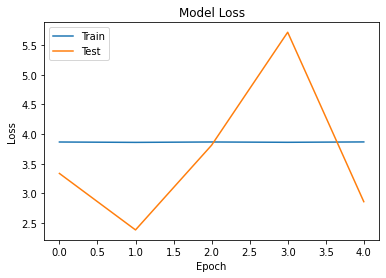

In [49]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_object.history['accuracy'])
plt.plot(history_object.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,add
from keras import backend as K
import tensorflow as tf

In [51]:
## dimensions of our images.
# Size of the image is 224*224*3 
img_width, img_height = 224, 224

train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_samples = 381 
nb_validation_samples = 164
batch_size = 16

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 381 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


# ResNet50 vanilla  pre-trained model 
ResNet-50 vanilla pre-trained model with the no weights.we do not include fully connected layers in this model.

In [53]:

inception_base_vanilla = applications.ResNet50(weights=None, include_top=False)


x = inception_base_vanilla.output
x = GlobalAveragePooling2D()(x)

# Fully connected output/classification layer
predictions = Dense(2, activation='softmax')(x)
# Create the full network so we can train on it
inception_transfer_vanilla = Model(inputs=inception_base_vanilla.input, outputs=predictions)

# Compiling the Models

We set the loss function, the optimization algorithm to be used and metrics to be calculated at the end of each epoch.

In [54]:
optimizer=optimizers.SGD(lr=1e-4, momentum=0.9)

In [55]:
# Compiling for ResNet50 vanilla pre-trained model
inception_transfer_vanilla.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
pwd

'/content/drive/My Drive/Datasets/parking_spots_detector'

In [57]:
ls


Archive/                       Models/                        README.md
Archive.zip                    Parking_Lots-3.ipynb           spot_dict.pickle
CNN_model_for_occupancy.ipynb  Parking_Lots-4.ipynb           test_images/
identify_parking_spots.ipynb   parking_Space_detection.ipynb  train_data/
Image_Processing.ipynb         parking_spot_detector.ipynb    with_parking.jpg
kaggle_Parking_Lots.ipynb      parking_video.mp4


# Fitting ResNet50 pre-trained model on train and validation data

In [58]:
# Save the model according to the conditions
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
# checkpoint
filepath="Models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


, callbacks=callbacks_list

# Fitting ResNet50 vanilla pre-trained model on train and validation data

In [59]:
history_vanilla = inception_transfer_vanilla.fit_generator(
train_generator,
epochs=15, shuffle = True, verbose = 1, validation_data = validation_generator, callbacks=callbacks_list)

Epoch 1/15
24/24 [==============================] - 42s 2s/step - loss: 0.3126 - accuracy: 0.9501 - val_loss: 866226.8750 - val_accuracy: 0.7683

Epoch 00001: val_accuracy improved from -inf to 0.76829, saving model to Models/weights-improvement-01-0.77.hdf5
Epoch 2/15
24/24 [==============================] - 21s 873ms/step - loss: 0.2359 - accuracy: 0.9790 - val_loss: 141032.8438 - val_accuracy: 0.2317

Epoch 00002: val_accuracy did not improve from 0.76829
Epoch 3/15
24/24 [==============================] - 21s 870ms/step - loss: 0.0925 - accuracy: 0.9764 - val_loss: 3444.7573 - val_accuracy: 0.2317

Epoch 00003: val_accuracy did not improve from 0.76829
Epoch 4/15
24/24 [==============================] - 21s 871ms/step - loss: 0.0891 - accuracy: 0.9764 - val_loss: 1359.0205 - val_accuracy: 0.2317

Epoch 00004: val_accuracy did not improve from 0.76829
Epoch 5/15
24/24 [==============================] - 21s 869ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 44.9714 - val_accura

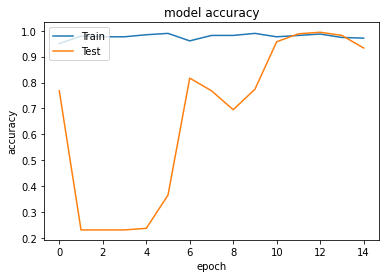

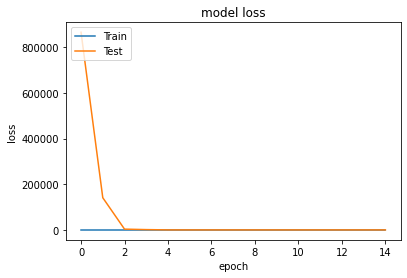

In [60]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_vanilla.history['accuracy'])
plt.plot(history_vanilla.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_vanilla.history['loss'])
plt.plot(history_vanilla.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [77]:
ls

Archive/                       Models/                        README.md
Archive.zip                    Parking_Lots-3.ipynb           spot_dict.pickle
CNN_model_for_occupancy.ipynb  Parking_Lots-4.ipynb           test_images/
identify_parking_spots.ipynb   parking_Space_detection.ipynb  train_data/
Image_Processing.ipynb         parking_spot_detector.ipynb    with_parking.jpg
kaggle_Parking_Lots.ipynb      parking_video.mp4


# Parking Spot Detector

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [78]:
# Reading the image
Parking_space = cv2.imread('test_images/parking_lot1.jpg')


In [79]:
Parking_space = cv2.imread('test_images/scene1380.jpg')

In [80]:
Parking_space

array([[[  2,   0,   0],
        [  5,   3,   2],
        [  5,   1,   0],
        ...,
        [138, 124, 106],
        [136, 122, 104],
        [135, 121, 103]],

       [[  3,   1,   0],
        [  6,   4,   3],
        [  6,   2,   1],
        ...,
        [137, 123, 105],
        [136, 122, 104],
        [135, 121, 103]],

       [[  2,   0,   0],
        [  5,   3,   2],
        [  6,   2,   1],
        ...,
        [137, 123, 105],
        [135, 121, 103],
        [135, 121, 103]],

       ...,

       [[ 94,  96,  96],
        [104, 109, 108],
        [186, 195, 192],
        ...,
        [105,  95,  78],
        [ 96,  86,  69],
        [103,  93,  76]],

       [[ 87,  92,  90],
        [114, 121, 118],
        [188, 199, 196],
        ...,
        [104,  94,  77],
        [ 95,  85,  68],
        [101,  91,  74]],

       [[ 18,  25,  22],
        [ 46,  55,  52],
        [118, 132, 128],
        ...,
        [103,  93,  76],
        [ 94,  84,  67],
        [100,  90,  73]]

In [81]:
def get_image():
    return np.copy(Parking_space)

def show_image(image):
    plt.figure(figsize=(13,12))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

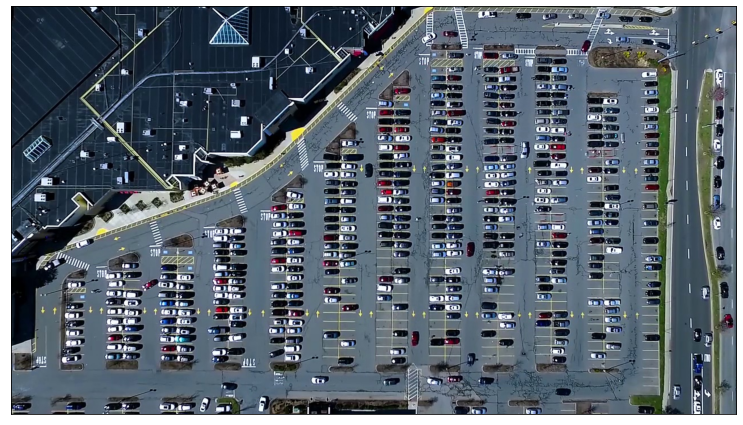

In [82]:
show_image(get_image())

In [83]:
#To transfrom the colorspace from BGR to grayscale so as to make things simpler
grayimg = cv2.cvtColor(Parking_space,cv2.COLOR_BGR2GRAY)


New Image Shape (720, 1280)


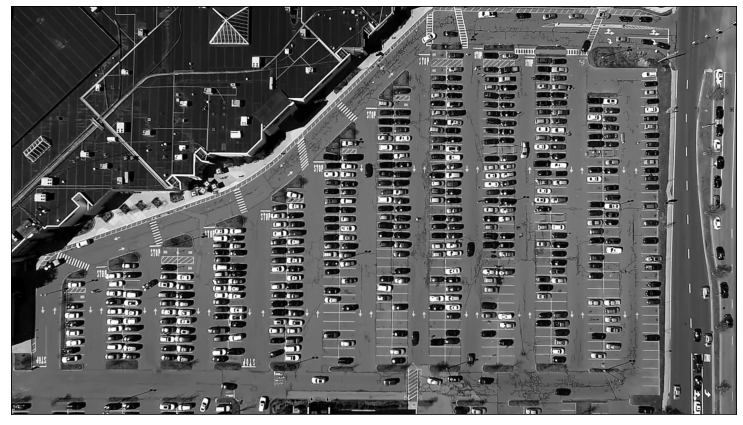

In [84]:
#To plot the image
plt.figure(figsize=(13,12))
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images

plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

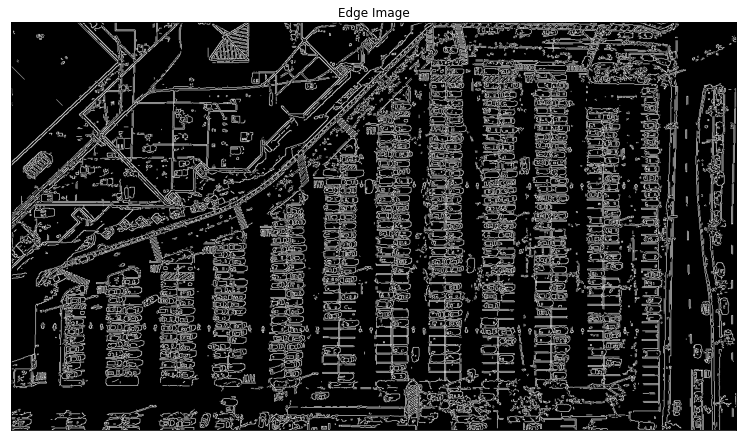

In [86]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test_images/scene1380.jpg')
edges = cv2.Canny(img,150,200)

plt.figure(figsize=(13,12))
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [87]:
#To understand this further, let's display one entire row of the image matrix
print('The first row of the image matrix contains',len(grayimg[1]),'pixels')
print(grayimg[1])

The first row of the image matrix contains 1280 pixels
[  1   4   2 ... 119 118 117]


Text(0.5, 1.0, 'Distribution of intensity values (Zoomed In)')

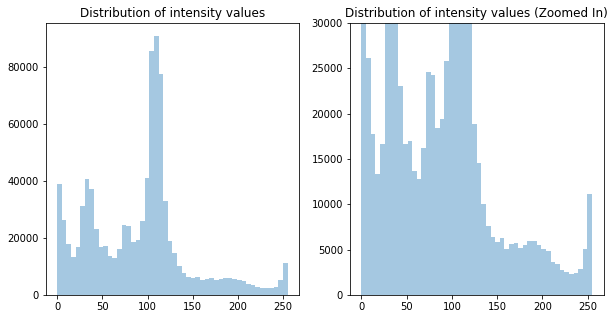

In [88]:
#Okay let's look at the distribution of the intensity values of all the pixels
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(),kde=False)#This is to flatten the matrix and put the intensity values of all the pixels in one single row vector
plt.title('Distribution of intensity values')

#To zoom in on the distribution and see if there is more than one prominent peak 
plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(),kde=False) 
plt.ylim(0,30000) 
plt.title('Distribution of intensity values (Zoomed In)')

In [89]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 82


In [90]:
mask=np.where(grayimg>thresh_val,1,0)

Text(0.5, 1.0, 'Mask')

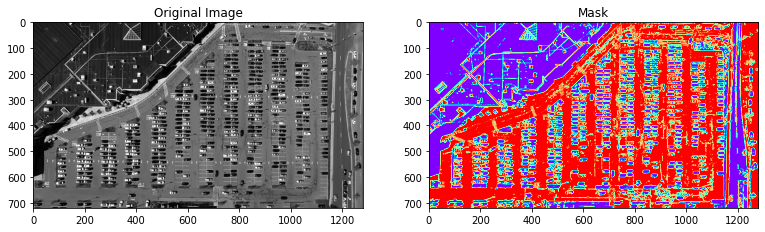

In [91]:
#To plot the original image and mask side by side
plt.figure(figsize=(13,12))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='rainbow')
plt.title('Mask')

([], <a list of 0 Text major ticklabel objects>)

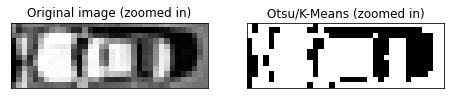

In [92]:
#To highlight the problem areas
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(grayimg[348:360,485:521],cmap='gray')
plt.title('Original image (zoomed in)')
plt.xticks([])
plt.yticks([])


plt.subplot(1,3,2)
plt.imshow(maskimg[348:360,485:521], cmap='gray')
plt.title('Otsu/K-Means (zoomed in)')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

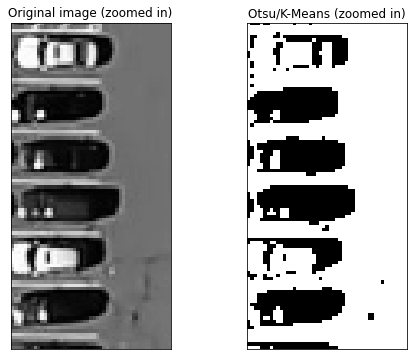

In [93]:
#To highlight the problem areas
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(grayimg[345:445,488:537],cmap='gray')
plt.title('Original image (zoomed in)')
plt.xticks([])
plt.yticks([])


plt.subplot(1,3,2)
plt.imshow(maskimg[345:445,488:537], cmap='gray')
plt.title('Otsu/K-Means (zoomed in)')
plt.xticks([])
plt.yticks([])